[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/master/Linear-Regression/LinearRegressionUsingPackages.ipynb)

## Linear Regression Notebook
#### By Gregory Glickert 
### This notebook is designed to show the many different ways to do linear regression in python. First we will generate some data

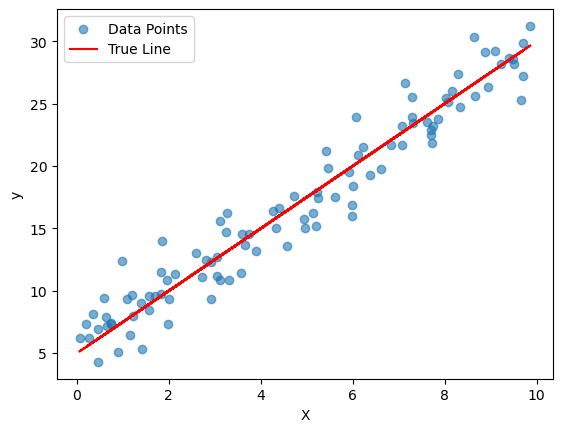

Data was generated using slope 2.5 and intercept 5 with a bit of noise


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate some example data
n_samples = 100
X = np.random.uniform(0, 10, n_samples)  # Independent variable
true_slope = 2.5
true_intercept = 5
noise = np.random.normal(0, 2, n_samples)  # Random noise

# Dependent variable (y)
y = true_slope * X + true_intercept + noise

# Create a DataFrame for easier visualization
data = pd.DataFrame({'X': X, 'y': y})

#plot our data
plt.scatter(data['X'], data['y'], alpha=0.6, label='Data Points')
plt.plot(X, true_slope * X + true_intercept, color='red', label="True Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
print(f"Data was generated using slope {true_slope} and intercept {true_intercept} with a bit of noise")

### Now that we have some data we can fit a linear regression model. The first one will we do is scipy.

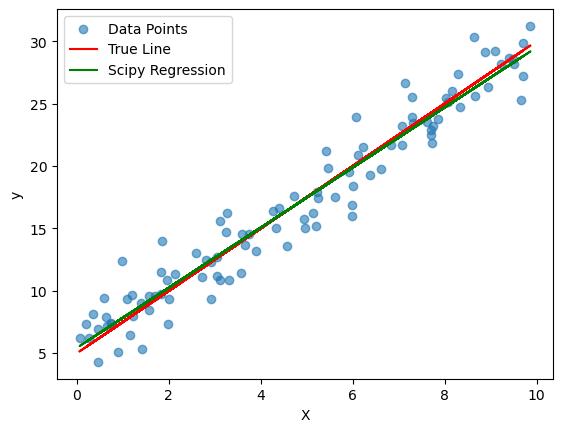

Data was generated using slope 2.5 and intercept 5 with a bit of noise

Scipy Regression Results:
Slope: 2.41, Intercept: 5.43


In [2]:
from scipy import stats

slope_scipy, intercept_scipy, r_value, p_value, std_err = stats.linregress(data['X'], data['y'])

plt.scatter(data['X'], data['y'], alpha=0.6, label='Data Points')
plt.plot(X, true_slope * X + true_intercept, color='red', label="True Line")
plt.plot(data['X'], slope_scipy * data['X'] + intercept_scipy, color='green', label='Scipy Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
print(f"Data was generated using slope {true_slope} and intercept {true_intercept} with a bit of noise")
print("\nScipy Regression Results:")
print(f"Slope: {slope_scipy:0.2f}, Intercept: {intercept_scipy:0.2f}")

### Now we will fit another regression model. This time using the statsmodel library. This is my favorite when doing regression models due to its similar R syntax and being about to print the results nicely

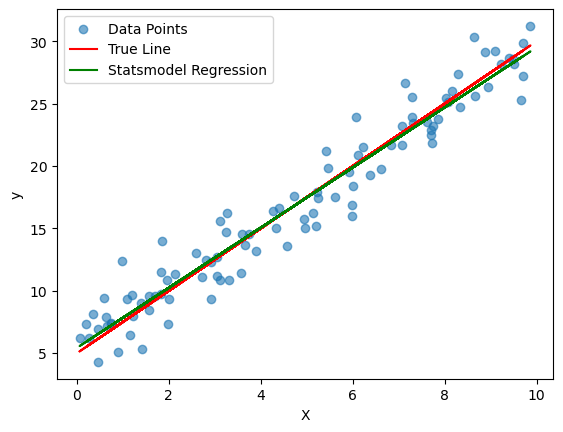

Data was generated using slope 2.5 and intercept 5 with a bit of noise

Statsmodel Regression Results:
Slope: 2.41, Intercept: 5.43


In [3]:
import statsmodels.api as sm

# getting the data formated for sm
X_with_intercept = sm.add_constant(data['X'])

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(data['y'], X_with_intercept)
results = model.fit()

intercept,slope = results.params

plt.scatter(data['X'], data['y'], alpha=0.6, label='Data Points')
plt.plot(X, true_slope * X + true_intercept, color='red', label="True Line")
plt.plot(data['X'], slope * data['X'] + intercept, color='green', label='Statsmodel Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print(f"Data was generated using slope {true_slope} and intercept {true_intercept} with a bit of noise")
print("\nStatsmodel Regression Results:")
print(f"Slope: {slope:0.2f}, Intercept: {intercept:0.2f}")

### We can see that the result from the statsmodel and scipy regression were the same. With the same slope and intercept. One feature to point out about the statsmodel regression is the summary.

In [4]:
print(results.summary()) # print works better than display for statmodel package

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1543.
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           8.82e-62
Time:                        13:11:28   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4302      0.341     15.944      0.0

### Finally, let's fit a regression using the pytorch package. This is a bit silly to do since there are easier ways to a regression, but when it comes to fitting more complex network models pytorch will be needed. Doing linear regression with pytorch can help you practice using pytorch.

Training network: 100%|██████████| 2000/2000 [00:04<00:00, 482.69it/s] 


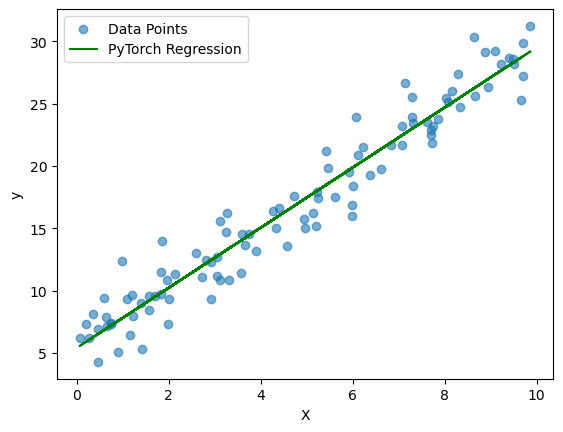


PyTorch Regression Results:
Slope: 2.41, Intercept: 5.43


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

torch.manual_seed(42)

# define our model this example we make a linear model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output 
    
    def forward(self, x):
        return self.linear(x)
    
model_pytorch = LinearRegressionModel()
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.SGD(model_pytorch.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer lr = learning rate

# pytorch works with tensors 
X_tensor = torch.tensor(data['X']).float().reshape(-1, 1)
y_tensor = torch.tensor(data['y']).float().reshape(-1, 1)

# Training loop
epochs = 2000
for epoch in tqdm(range(epochs), desc='Training network'):
    # Forward pass
    y_pred = model_pytorch(X_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update parameters
    
# Get the learned parameters (weights and bias) after training
pytorch_slope = model_pytorch.linear.weight.item()
pytorch_intercept = model_pytorch.linear.bias.item()

plt.scatter(data['X'], data['y'], alpha=0.6, label='Data Points')
plt.plot(data['X'], pytorch_slope * data['X'] + pytorch_intercept, color='green', label='PyTorch Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

print("\nPyTorch Regression Results:")
print(f"Slope: {pytorch_slope:0.2f}, Intercept: {pytorch_intercept:0.2f}")

### All the models got the same slope and intercept for our simple example

In [6]:
print("Scipy Regression Results:")
print(f"Slope: {slope_scipy:0.2f}, Intercept: {intercept_scipy:0.2f}")
print("Statsmodel Regression Results:")
print(f"Slope: {slope:0.2f}, Intercept: {intercept:0.2f}")
print("PyTorch Regression Results:")
print(f"Slope: {pytorch_slope:0.2f}, Intercept: {pytorch_intercept:0.2f}")

Scipy Regression Results:
Slope: 2.41, Intercept: 5.43
Statsmodel Regression Results:
Slope: 2.41, Intercept: 5.43
PyTorch Regression Results:
Slope: 2.41, Intercept: 5.43
